In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
#from sklearn_extra.cluster import KMedoids

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
from xgboost import plot_importance
from keras.callbacks import EarlyStopping


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
fetal_df = pd.read_csv('/content/drive/MyDrive/MyLecture/2023/데이터시각화/과제2/data/fetal_health.csv')

fetal_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
# 데이터의 상위 5개 행을 출력
print(fetal_df.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

In [5]:
# 데이터의 정보 출력: 행 수, 열 수, 각 열의 non-null 개수 및 데이터 타입 등
print(fetal_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
# 데이터의 기술 통계 정보 출력: 평균, 표준편차, 최소값, 1사분위수, 중간값, 3사분위수, 최대값 등
print(fetal_df.describe())

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


<Axes: >

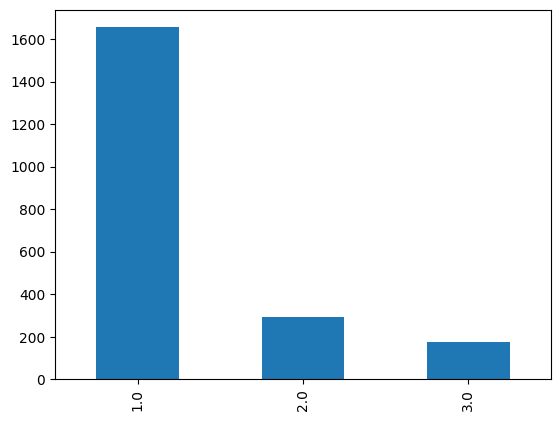

In [7]:
# 데이터 탐색
# 타겟 변수의 분포 확인
print(fetal_df['fetal_health'].value_counts())
fetal_df['fetal_health'].value_counts().plot(kind='bar')

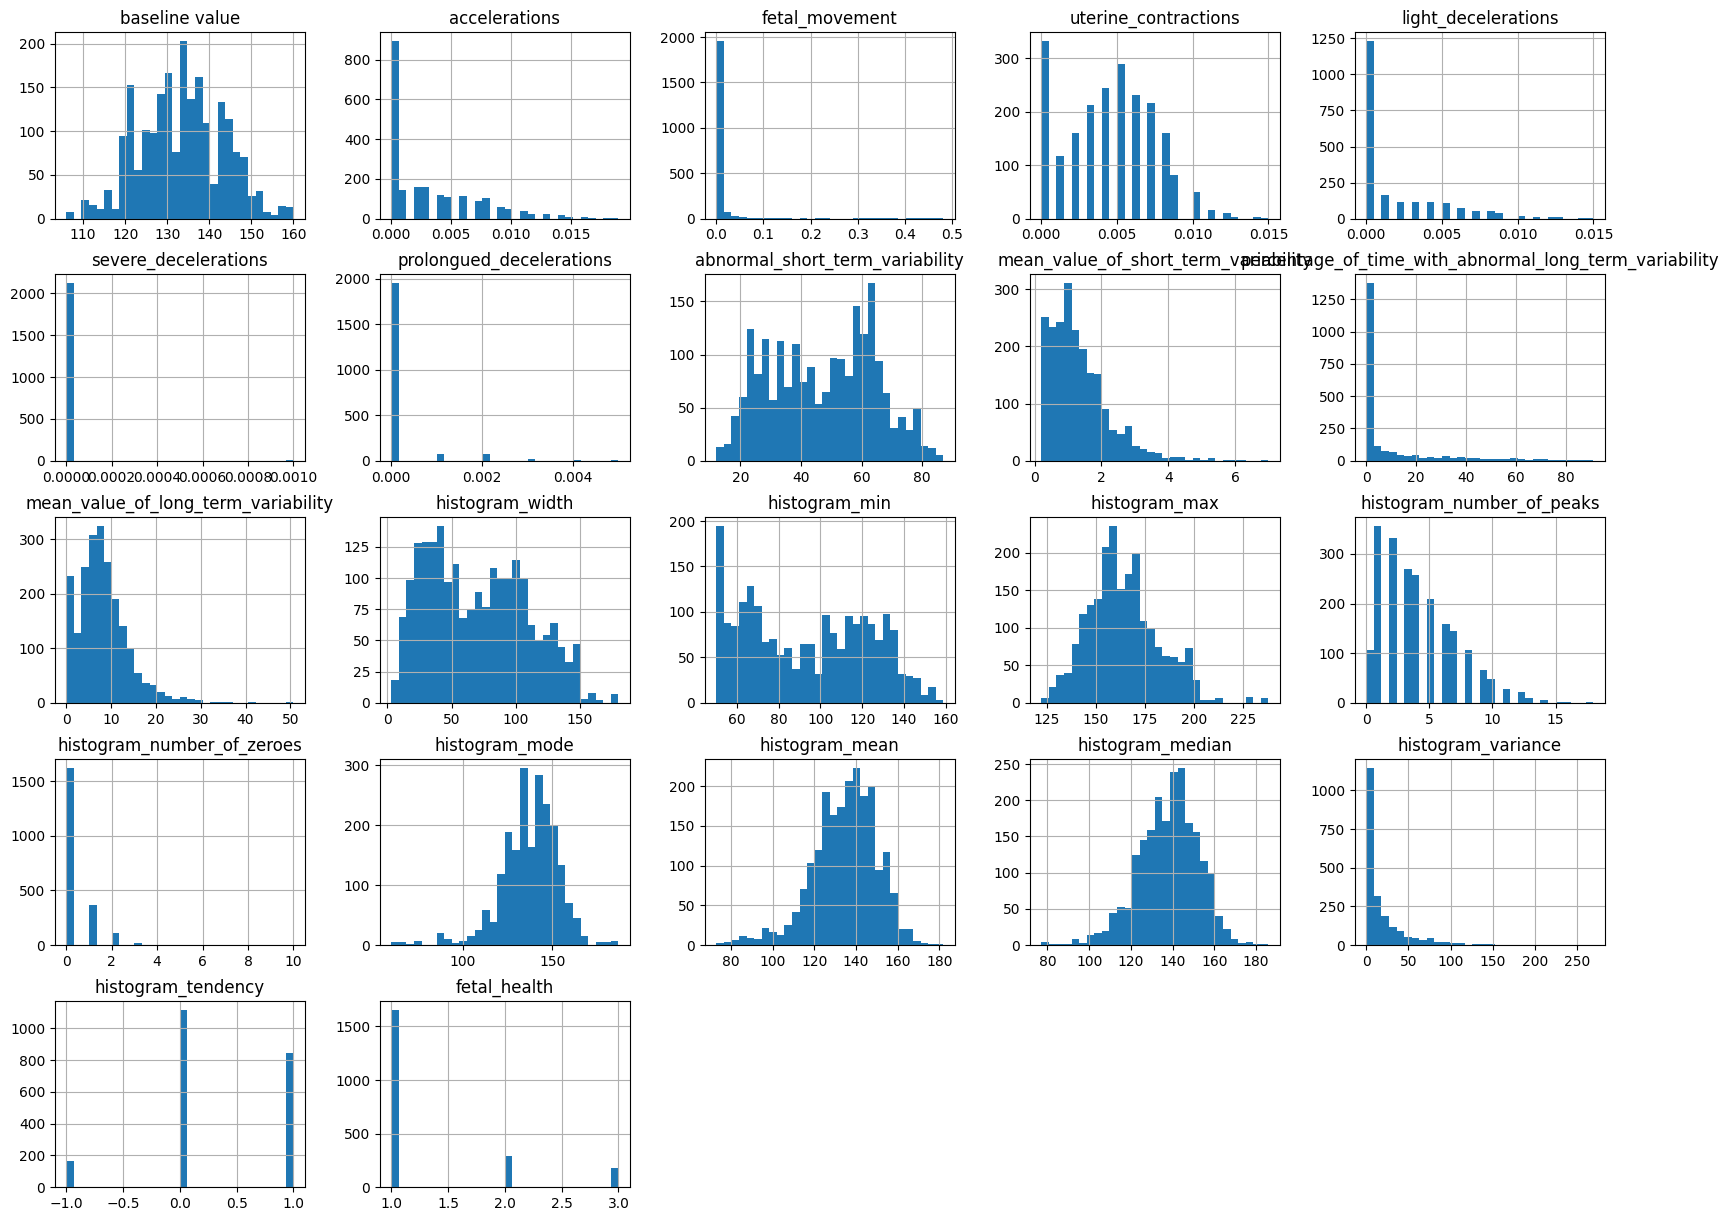

In [8]:
# 각 피처의 분포 확인
fetal_df.hist(bins=30, figsize=(20,15))
plt.show()

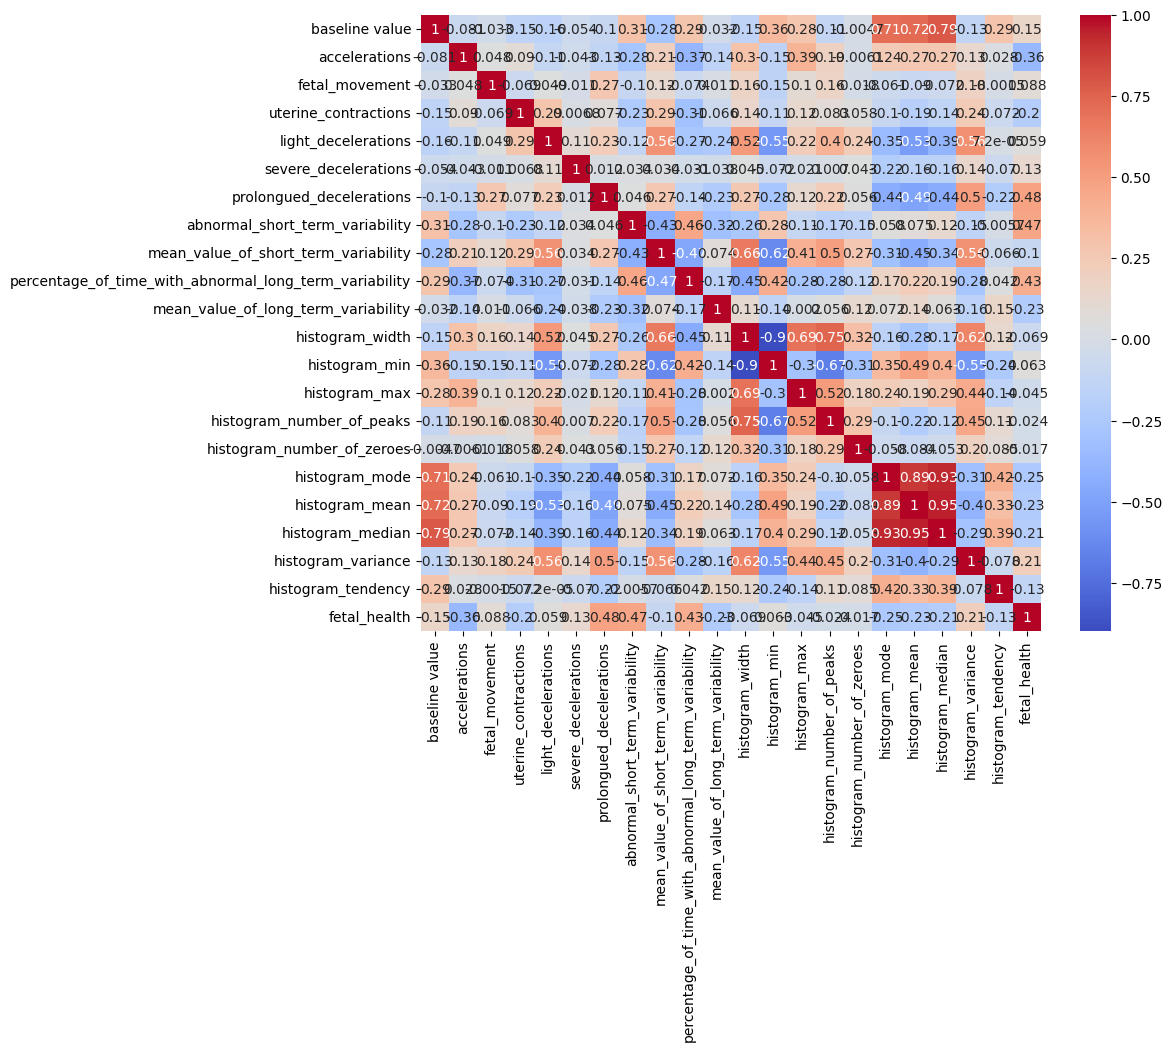

In [9]:
# 피처 간의 상관관계 확인(다중공선성 확인)
plt.figure(figsize=(10, 8))
sns.heatmap(fetal_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
# 입력 변수와 출력 변수 분리
X = fetal_df.drop(['fetal_health'], axis=1)  # 입력 변수
y = fetal_df['fetal_health']  # 출력 변수

In [8]:
 # 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# DT(Decision Tree)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# 예측 수행
dt_pred = dt_clf.predict(X_test)# 1 아님 0
dt_pred_proba = dt_clf.predict_proba(X_test)[:,1] # 가능성 예측

# 평가 수행
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, pos_label='positive', average='micro')
dt_recall = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred , average='micro')
#dt_roc_auc = roc_auc_score(y_test, dt_pred_proba)

#print('ACCURACY: {0:.4f}, PRECISION: {1:.4f}, RECALL: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc))
print('ACCURACY: {0:.4f}, PRECISION: {1:.4f}, RECALL: {2:.4f}, F1: {3:.4f}'
      .format(dt_accuracy, dt_precision, dt_recall, dt_f1))
# 최소 80%는 넘어야 적정한 모델

ACCURACY: 0.9225, PRECISION: 0.9225, RECALL: 0.9225, F1: 0.9225


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [14]:
# cross_val_score()로 k-fold 교차 검증 수행
dt_scores = cross_val_score(dt_clf, X, y, cv=5)
# cross_validation : 2126개 데이터를 5개로 나누어 1번 테스트/ 2,3,4,5 훈련(순서대로 진행)
# 평균 사용하면 된다.
# 코드 알아두기 !!

print('교차 검증별 정확도:', np.round(dt_scores, 4))
print('평균 검증 정확도:', np.round(np.mean(dt_scores), 4))

교차 검증별 정확도: [0.8498 0.8541 0.8941 0.8518 0.7012]
평균 검증 정확도: 0.8302


In [15]:
# 'feta_health' 열을 제외한 열 이름 가져오기
feature_names = [col for col in fetal_df if col != 'fetal_health']
print(feature_names)

['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']


In [16]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["1", "2", "3"], feature_names=feature_names, impurity=False, filled=True)

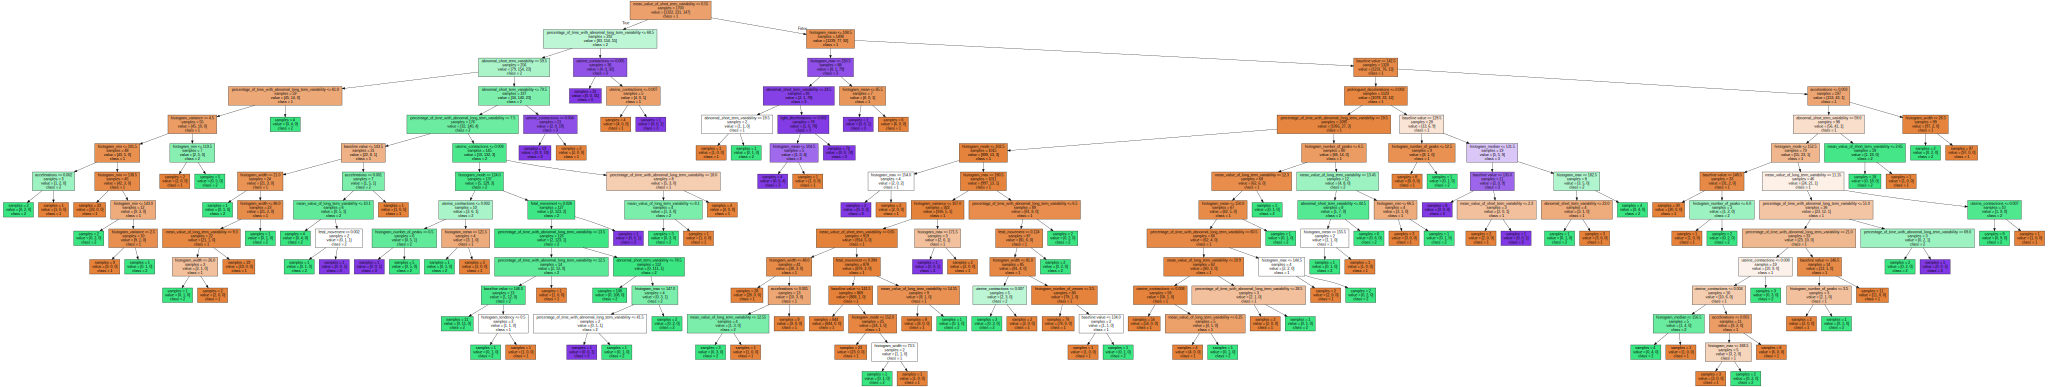

In [17]:
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [18]:
print(dt_clf.feature_importances_)

[0.04336434 0.0363517  0.01064972 0.04328838 0.00059677 0.
 0.01721591 0.11585309 0.2343722  0.1283844  0.02668517 0.02195993
 0.01621746 0.03253358 0.02060459 0.00155292 0.01799941 0.20898189
 0.01064351 0.01115232 0.00159274]


In [19]:
features = pd.Series(
    dt_clf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(features)

mean_value_of_short_term_variability                      0.234372
histogram_mean                                            0.208982
percentage_of_time_with_abnormal_long_term_variability    0.128384
abnormal_short_term_variability                           0.115853
baseline value                                            0.043364
uterine_contractions                                      0.043288
accelerations                                             0.036352
histogram_max                                             0.032534
mean_value_of_long_term_variability                       0.026685
histogram_width                                           0.021960
histogram_number_of_peaks                                 0.020605
histogram_mode                                            0.017999
prolongued_decelerations                                  0.017216
histogram_min                                             0.016217
histogram_variance                                        0.01

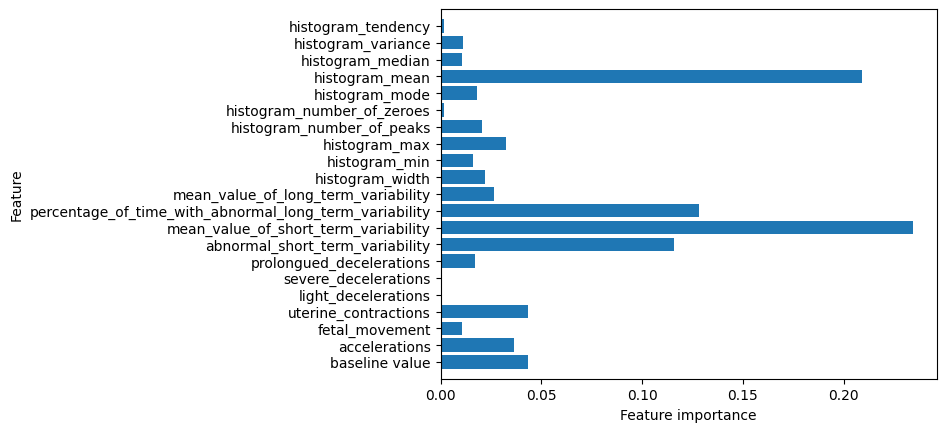

In [20]:
def plot_feature_importances_health(dt_clf):
    n_features = len(feature_names)
    plt.barh(np.arange(n_features), dt_clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_health(dt_clf)

In [21]:
#Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

rf_y_pred = rf_clf.predict(X_test)
rf_y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

In [22]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='micro')
rf_recall = recall_score(y_test, rf_y_pred, average='micro')
rf_f1 = f1_score(y_test,rf_y_pred, average='micro')
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(rf_accuracy, rf_precision, rf_recall, rf_f1))

정확도: 0.9484, 정밀도: 0.9484, 재현율: 0.9484,\F1: 0.9484


In [26]:
# SVM 적용하기

In [9]:
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
 # 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# SVM 모델 초기화
svm_model = svm.SVC()

# SVM 모델 학습
svm_model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측
y_pred = svm_model.predict(X_test)

# 정확도 평가
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.903755868544601


In [12]:
# 성능 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       333
         2.0       0.70      0.72      0.71        64
         3.0       0.92      0.76      0.83        29

    accuracy                           0.90       426
   macro avg       0.85      0.81      0.83       426
weighted avg       0.90      0.90      0.90       426



In [13]:
# LR(Logistic Regression)
# 로지스틱 회귀 모델 생성
model_LR = LogisticRegression(random_state=42)

# 모델 훈련
model_LR.fit(X_train, y_train)

# 예측
y_pred = model_LR.predict(X_test)

In [14]:
# 정확도 평가
LR_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", LR_accuracy)

Accuracy: 0.8779342723004695


In [15]:
# 성능 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       333
         2.0       0.63      0.64      0.64        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.88       426
   macro avg       0.77      0.78      0.77       426
weighted avg       0.88      0.88      0.88       426



In [16]:
# DNN
# DNN 모델 구성
DNN_model = Sequential() # 하나만 쓸 때
DNN_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # sequential 다음 첫 번째 은닉층 (32개 노드로 구성)
DNN_model.add(Dense(16, activation='relu'))  # 두 번째 은닉층 (16개 노드) 추가(활성화 함수 거칠 때 사용 가장 많이 사용 = relu)
DNN_model.add(Dense(1, activation='sigmoid'))  # 출력층 (1개 노드) 마지막으로 출력(0~1 사이의 분포)

# 모델 컴파일
DNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #binary_crossentropy손실 함수 가장 많이사용 (0~1 사이 값이니까)
# Early stopping 설정
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# 모델 훈련- early stop
DNN_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

# 모델 훈련
#DNN_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# 예측 (확률을 클래스 레이블로 변환) - 0.5보다 크면 y_pred로 변경
y_pred = (DNN_model.predict(X_test) > 0.5).astype("int32")

# 성능 평가
print(classification_report(y_test, y_pred))

Epoch 1/50
170/170 [==============================] - 1s 2ms/step - loss: -2.9784 - accuracy: 0.7700 - val_loss: -7.7817 - val_accuracy: 0.7817
Epoch 2/50
170/170 [==============================] - 0s 2ms/step - loss: -28.1914 - accuracy: 0.7776 - val_loss: -52.6921 - val_accuracy: 0.7817
Epoch 3/50
170/170 [==============================] - 0s 2ms/step - loss: -120.9878 - accuracy: 0.7776 - val_loss: -180.4349 - val_accuracy: 0.7817
Epoch 4/50
170/170 [==============================] - 0s 2ms/step - loss: -335.8768 - accuracy: 0.7776 - val_loss: -443.8109 - val_accuracy: 0.7817
Epoch 5/50
170/170 [==============================] - 0s 2ms/step - loss: -735.5050 - accuracy: 0.7776 - val_loss: -887.5173 - val_accuracy: 0.7817
Epoch 6/50
170/170 [==============================] - 0s 1ms/step - loss: -1352.3173 - accuracy: 0.7776 - val_loss: -1530.0400 - val_accuracy: 0.7817
Epoch 7/50
170/170 [==============================] - 0s 1ms/step - loss: -2212.8794 - accuracy: 0.7776 - val_loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# 군집분석
fetal_df = pd.read_csv('/content/drive/MyDrive/MyLecture/2023/데이터시각화/과제2/data/fetal_health.csv')
score_samples = silhouette_samples(fetal_df, fetal_df['fetal_health'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (2126,)


In [40]:
fetal_df['silhouette_coeff'] = score_samples

In [47]:
# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_samples(fetal_df, fetal_df['fetal_health'])
print('fetal health 데이터 Silhouette Analysis Score:{0:}'.format(average_score))

fetal_df.head(3)

fetal health 데이터 Silhouette Analysis Score:[-0.0831532   0.27227798  0.27342582 ...  0.11836244  0.14576902
 -0.31134768]


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,silhouette_coeff
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,-0.083153
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,0.272278
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,0.273426


In [49]:
fetal_df.groupby('fetal_health')['silhouette_coeff'].mean()

fetal_health
1.0    0.116903
2.0    0.167968
3.0   -0.128764
Name: silhouette_coeff, dtype: float64

In [50]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


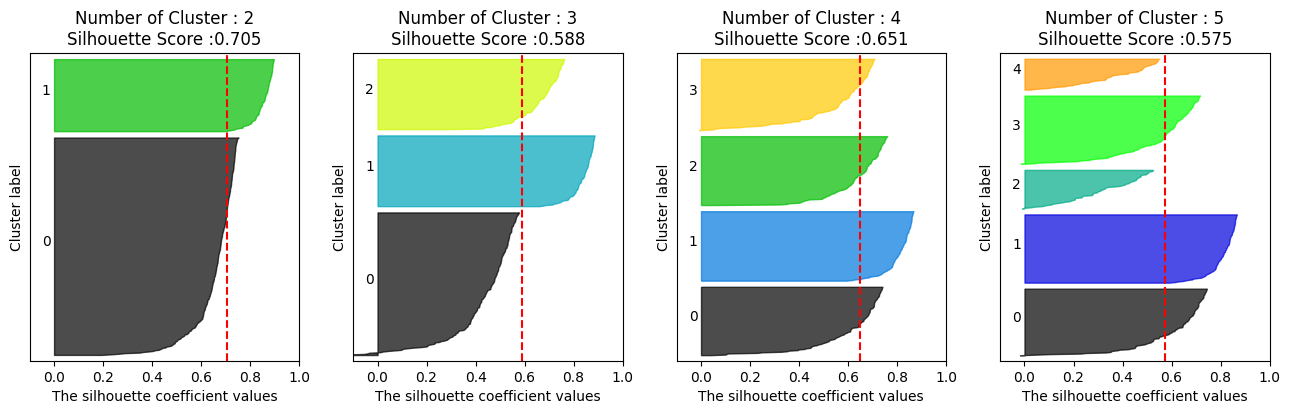

In [51]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화하는 코드, 나중에 붙여넣기 하기
visualize_silhouette([ 2, 3, 4, 5], X)

In [ ]:
#K-Means

In [52]:
fetal_df = pd.read_csv('/content/drive/MyDrive/MyLecture/2023/데이터시각화/과제2/data/fetal_health.csv')
kmeans = KMeans(n_clusters=3, random_state=0).fit(fetal_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-57-ec028b2f0558>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')  # 첫 번째 특징과 두 번째 특징을 사용하여 시각화


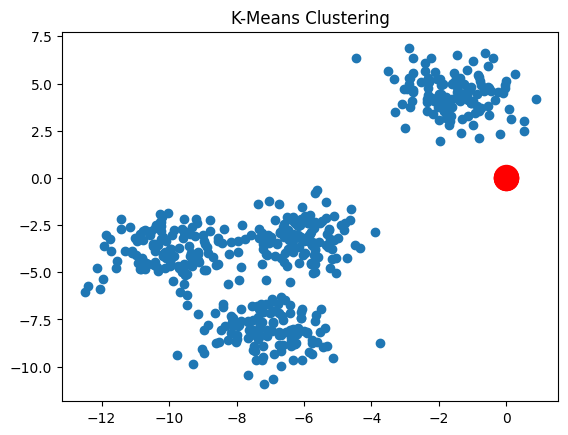

In [57]:
# 클러스터 할당 결과를 얻음
labels = kmeans.labels_ # labels_에 저장

# 결과 시각화
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
# 첫 번째 특징과 두 번째 특징을 사용하여 시각화
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red')
plt.title('K-Means Clustering')
plt.show()


In [58]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# kmeans++쓰는 방법 init='k-means++'
kmeans.fit(fetal_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [59]:
print(kmeans.labels_)

[1 1 1 ... 0 0 0]


In [63]:
#PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(fetal_df)

fetal_df['pca_x'] = pca_transformed[:,0]
fetal_df['pca_y'] = pca_transformed[:,1]
fetal_df.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,pca_x,pca_y
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,20.935266,44.643942
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,61.820698,-30.332514
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,62.558257,-29.140141


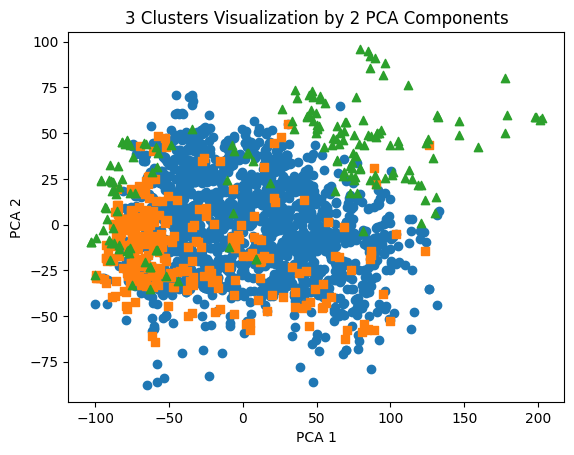

In [64]:
# 군집 값이 1, 2, 3인 경우마다 별도의 인덱스로 추출
marker0_ind = fetal_df[fetal_df['fetal_health']==1].index
marker1_ind = fetal_df[fetal_df['fetal_health']==2].index
marker2_ind = fetal_df[fetal_df['fetal_health']==3].index

# 군집 값 1, 2, 3에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=fetal_df.loc[marker0_ind, 'pca_x'], y=fetal_df.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=fetal_df.loc[marker1_ind, 'pca_x'], y=fetal_df.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=fetal_df.loc[marker2_ind, 'pca_x'], y=fetal_df.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [65]:
!pip install scikit-learn-extra
# 기본제공 아니라서 별도 설치 필요

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.2 MB/s eta 0:00:00


<ipython-input-69-f8d2aa801371>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


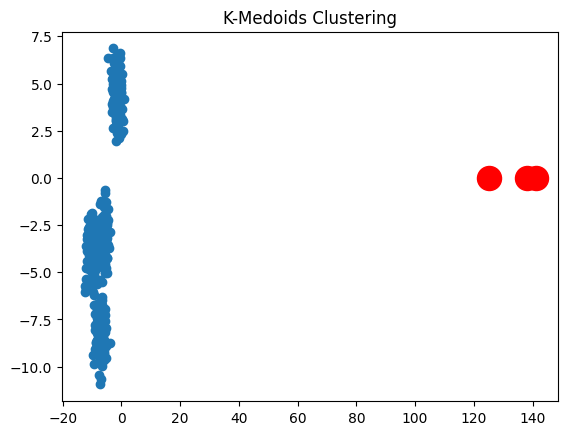

In [69]:
fetal_df = pd.read_csv('/content/drive/MyDrive/MyLecture/2023/데이터시각화/과제2/data/fetal_health.csv')

# K-medoids 알고리즘 적용
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(fetal_df)

# 클러스터 할당 결과를 얻음
labels = kmedoids.labels_

# 결과 시각화
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Medoids Clustering')
plt.show()

In [17]:
# 군집 시각화 전부 이상하게 됨
# 고칠 필요 있음
fetal_df = pd.read_csv('/content/drive/MyDrive/MyLecture/2023/데이터시각화/과제2/data/fetal_health.csv')

In [18]:
# 사용할 두 가지 특성 선택
X = fetal_df[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'fetal_health']]

# K-means 클러스터링 적용(n=2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# 클러스터 할당 결과를 얻음
labels = kmeans.labels_
X['fetal_health']=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-18-4271a0e862a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fetal_health']=kmeans.labels_


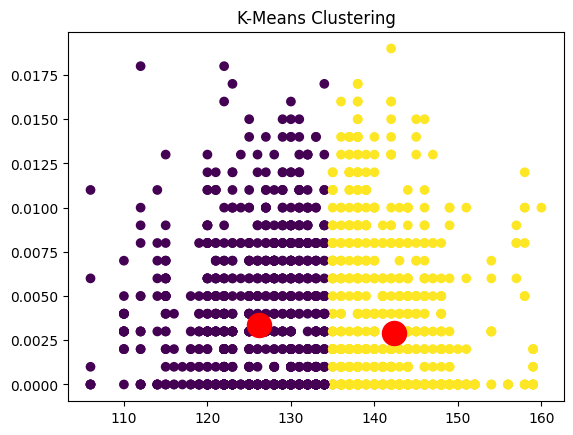

In [19]:
# 결과 시각화
plt.scatter(X['baseline value'], X['accelerations'], c=labels, cmap='viridis') # 그냥 속성 2개 뽑아서 뿌림
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Means Clustering')
plt.show()

In [27]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X)

X['pca_x'] = pca_transformed[:,0]
X['pca_y'] = pca_transformed[:,1]
X.head()

<ipython-input-27-d144f8594e98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pca_x'] = pca_transformed[:,0]
<ipython-input-27-d144f8594e98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pca_y'] = pca_transformed[:,1]


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,fetal_health,pca_x,pca_y
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,0,18.824209,0.234833
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,0,1.867874,-0.863449
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,0,0.454846,-0.954976
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,0,-0.958182,-1.046498
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,0,1.867874,-0.863444


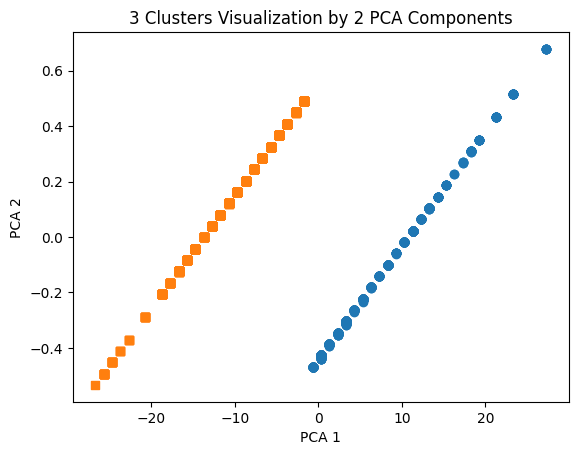

In [24]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = X[X['fetal_health']==0].index
marker1_ind = X[X['fetal_health']==1].index
marker2_ind = X[X['fetal_health']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=X.loc[marker0_ind, 'pca_x'], y=X.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=X.loc[marker1_ind, 'pca_x'], y=X.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=X.loc[marker2_ind, 'pca_x'], y=X.loc[marker2_ind, 'pca_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()
# PCA 사용해야 함